# Step 1: Undestanding the Problem


- Aim of the problem is extract and present key insights and recommendations from the dataset (including text attributes) using a combination of descriptive and natural language processing techniques.

- Features available are:

    - reviewerID: Instrument reviewerId

    - asin: Instrument ID to identify the instuments uniquely

    - reviewerName: Number of person who has revieved the Instument

    - helpful: How helful the revieves were

    - overall: The rating provided by the reviewer for the instrument

    - summary : The description about the product as provided by the reviewver
    
    - unixReviewTime: Unix time of the review
    
    - reviewTime: Date of the review

Data Source: Data Set Shared by Bank of Ireland for submitting application for the Lead Data Analyst position we have available within our Group Internal Audit team.


# Step 2: Import Libs and Dataset

SAGEMAKER Image Used
- Data Science [datascience-1.0]: Data Science is a Conda image with the most commonly used Python packages and libraries, such as NumPy and SciKit Learn.


In [224]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [379]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Whiz.Ai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [409]:
from string import punctuation
#NLTK libraries
import nltk
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


In [377]:
from nltk.corpus import stopwords


In [208]:
# read the Json file 

df = pd.read_json('Musical_Instruments_5.json', lines=True)

# Step 3: Understanding the dataset provides


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


<AxesSubplot:>

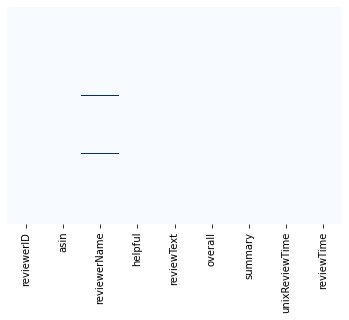

In [159]:
# check if there are any Null values
print(df.isnull().sum())
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [75]:
# Check the dataframe info for datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [18]:
# Read the dataframe to get the reference of the data prresent in the columns

df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [219]:
df.groupby('overall').describe()


helpful                                                  \
          count      mean       std  min  25%  50%     75%  max   
overall                                                           
1         217.0  0.330553  0.391282  0.0  0.0  0.0  0.6700  1.0   
2         250.0  0.287600  0.380346  0.0  0.0  0.0  0.5000  1.0   
3         772.0  0.275687  0.402314  0.0  0.0  0.0  0.6700  1.0   
4        2084.0  0.282970  0.432186  0.0  0.0  0.0  0.8025  1.0   
5        6938.0  0.253758  0.420095  0.0  0.0  0.0  0.6700  1.0   

        unixReviewTime                                            \
                 count          mean           std           min   
overall                                                            
1                217.0  1.363610e+09  3.693997e+07  1.141344e+09   
2                250.0  1.361242e+09  3.770940e+07  1.190678e+09   
3                772.0  1.361718e+09  3.633831e+07  1.161389e+09   
4               2084.0  1.359799e+09  3.914760e+07  1.095466e+09   
5               6938.0  1.360608e+09  3.757515e+07  1.096416e+09   

                                                                 
                  25%           50%           75%           max  
overall                                                          
1        1.347926e+09  1.370995e+09  1.390349e+09  1.405210e+09  
2        1.342116e+09  1.369872e+09  1.389506e+09  1.405210e+09  
3        1.343282e+09  1.369008e+09  1.389053e+09  1.405901e+09  
4        1.342915e+09  1.369138e+09  1.388707e+09  1.405987e+09  
5        1.343606e+09  1.367971e+09  1.388945e+09  1.405901e+09

In [74]:
print('Data Set size ----' , df.shape)
print()
print('Unique Instruments Reviewed       : ' , len(df.asin.unique()))
print('Unique Reviewers who reviewed     : ' , len(df.reviewerID.unique()))
print('Unique Reviewers Name             : ' , len(df.reviewerName.unique()))
#print('Unique helpful : ' , len(df.helpful.unique()))
print('Unique Messages Shared by reviewer: ' , len(df.reviewText.unique()))
print('Unique Summary Shared by Reviewer : ' , len(df.summary.unique()))
print('Unique unixReviewTime             : ' , len(df.unixReviewTime.unique()))
print('Unique reviewTime                 : ' , len(df.reviewTime.unique()))
print('Unique Overall Rating             : ' , len(df.overall.unique()))
print('Unique Overall Ratings            : ' , df.overall.unique())




Data Set size ---- (10261, 9)

Unique Instruments Reviewed       :  900
Unique Reviewers who reviewed     :  1429
Unique Reviewers Name             :  1398
Unique Messages Shared by reviewer:  10255
Unique Summary Shared by Reviewer :  8852
Unique unixReviewTime             :  1570
Unique reviewTime                 :  1570
Unique Overall Rating             :  5
Unique Overall Ratings            :  [5 3 4 2 1]


In [236]:
df.overall.value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

# Step 4: Filling missing Value
- ReviewerName column Contains Null Values and there are arround 27 rows in the data set with such values.
- Its not advisable to drop those columns so we can fill he name with random values.
- we can get get the names of thease ID from the present data set, please go through below.


In [209]:
reviewerID_= df[df['reviewerName'].isnull()]['reviewerID']
reviewerID_.shape

(27,)

In [210]:
df[df['reviewerID'] == 'A14VAT5EAX3D9S'].head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
263,A14VAT5EAX3D9S,B0002CZSJO,NaN,"[0, 0]",It is exactly what you need in a capo! You can...,5,Great,1364860800,"04 2, 2013"


In [211]:
temp_df=df.loc[df['reviewerID'].isin(reviewerID_)][['reviewerID','reviewerName' ]]
temp_df=temp_df.drop_duplicates(subset = ["reviewerID","reviewerName"]).dropna()
temp_df=temp_df.set_index('reviewerID')
temp_df=temp_df.T.to_dict('list')
temp_df = {k: str(v[0]) for k,v in temp_df.items()}
temp_df

{'A14VAT5EAX3D9S': 'Jake',
 'A3GSBNVP2LPFRB': 'johns3620',
 'A2RVY2GDMZHH4': 'puddytat',
 'A38L9I59GH34O0': 'A Customer',
 'A1WD8RFNIGRPDH': 'Mike N.',
 'A3NK6WKA7GKRZS': 'p pouncey',
 'A3CVZRPQH1PFQ5': 'Parker Hicks',
 'A3MONHA5DCPPLZ': '3rdtimer',
 'A3BMYEA3J6RBVV': 'Y. Xu',
 'AA5TINW2RJ195': 'TheSunrisePost',
 'AJUXP5GEE2VRP': 'CUSTOMER',
 'A2T8JRVJRVNX8R': 'DeTechTive "Max"',
 'AKP6IWJ24C1A5': 'Dakota Brown'}

In [212]:
df_test=df[df['reviewerName'].isnull()]
df_test['reviewerName']=df_test.reviewerID.map(temp_df)
print(df_test.shape)
df_test.head()

(27, 9)


<ipython-input-212-fc9bc6b2b2c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['reviewerName']=df_test.reviewerID.map(temp_df)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
41,AA5TINW2RJ195,B000068NW5,TheSunrisePost,"[0, 0]",Good quality cable and sounds very good,5,Five Stars,1405382400,"07 15, 2014"
263,A14VAT5EAX3D9S,B0002CZSJO,Jake,"[0, 0]",It is exactly what you need in a capo! You can...,5,Great,1364860800,"04 2, 2013"
264,A2RVY2GDMZHH4,B0002CZSJO,puddytat,"[0, 0]",Love these capos and nice that you can get the...,5,Always great Kyser,1356652800,"12 28, 2012"
432,A3BMYEA3J6RBVV,B0002CZVB4,Y. Xu,"[0, 0]",Bought it as a gift. Friend loved it very much.,5,Friend loved it very much,1405209600,"07 13, 2014"
667,AA5TINW2RJ195,B0002D01K4,TheSunrisePost,"[0, 0]",At first it look small for my guitar but it fi...,5,Love it!,1405382400,"07 15, 2014"


In [213]:
print(df.shape)
df= df.dropna(subset=['reviewerName']) 
df=df.append(df_test)
print(df.shape)

(10261, 9)
(10261, 9)


In [214]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# Step 5: Finding the significance of all the columns
- reviewerID , asin , reviewerName	acts as identifiers
- helpful columns being a list value cannot be used by the ML model directly so need to find alternative way to save the value
- however the both columns would have significatce when they are binded together as the significance of the column is for example out of 2 only one was helpful
- also column reviewText and summary have same level of information i.e if reviewis bad summy wont be good so we can combine those column so that ML model wont have domination of similar features.

In [215]:
df[['Num','Den']] = df.helpful.apply(lambda x : pd.Series(str(x)[1:-1].split(","))).astype(int)
df['helpful'] = ((df['Num'] / df['Den']).round(2)).replace(np.nan, 0)
df=df.drop(['Num','Den'], axis=1)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0.00,"Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,0.93,The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1.00,The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0.00,Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0.00,This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
7479,A3GSBNVP2LPFRB,B002VA464S,johns3620,0.00,This mic fits my studio need perfectly. It's U...,5,Great mic awesome price,1383436800,"11 3, 2013"
7480,A3CVZRPQH1PFQ5,B002VA464S,Parker Hicks,0.33,Im starting a podcast. I blindly lept to buy t...,2,Great for one person without friends.,1376006400,"08 9, 2013"
7603,AA5TINW2RJ195,B0037M62AK,TheSunrisePost,0.00,"Good strap, very comfortable and strong.",5,Five Stars,1405382400,"07 15, 2014"
7866,A3NHUK1ISMZCFZ,B003CLIPHO,NaN,0.00,Works awesome :),5,Five Stars,1405814400,"07 20, 2014"


In [225]:
df['summary'] = df['reviewText'] + ' '+ df['summary'] 
The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]Jake
df=df.drop(['reviewText'], axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0.00,"Not much to write about here, but it does exac...",5,"Not much to write about here, but it does exac...",1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,0.93,The product does exactly as it should and is q...,5,The product does exactly as it should and is q...,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1.00,The primary job of this device is to block the...,5,The primary job of this device is to block the...,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0.00,Nice windscreen protects my MXL mic and preven...,5,Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0.00,This pop filter is great. It looks and perform...,5,This pop filter is great. It looks and perform...,1392940800,"02 21, 2014"


In [233]:
df[['DD','YY']] = df.reviewTime.apply(lambda x : pd.Series(str(x).split(",")))
df[['DT','MM']] = df.DD.apply(lambda x : pd.Series(str(x).split(" ")))
df=df.drop(['DD'], axis=1)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,DD,YY
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0.00,5,"Not much to write about here, but it does exac...",1393545600,"02 28, 2014",02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,0.93,5,The product does exactly as it should and is q...,1363392000,"03 16, 2013",03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1.00,5,The primary job of this device is to block the...,1377648000,"08 28, 2013",08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0.00,5,Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014",02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0.00,5,This pop filter is great. It looks and perform...,1392940800,"02 21, 2014",02 21,2014


In [373]:
df['Message_Length'] = df['summary'].astype(str).map(len)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime,reviewTime,DD,YY,DT,MM,Message_Length
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",0.00,5,"Not much to write about here, but it does exac...",1393545600,"02 28, 2014",02 28,2014,02,28,272
1,A14VAT5EAX3D9S,1384719342,Jake,0.93,5,The product does exactly as it should and is q...,1363392000,"03 16, 2013",03 16,2013,03,16,548
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",1.00,5,The primary job of this device is to block the...,1377648000,"08 28, 2013",08 28,2013,08,28,456
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",0.00,5,Nice windscreen protects my MXL mic and preven...,1392336000,"02 14, 2014",02 14,2014,02,14,235
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,0.00,5,This pop filter is great. It looks and perform...,1392940800,"02 21, 2014",02 21,2014,02,21,196


# Step 6: Exploratory Data Analysis


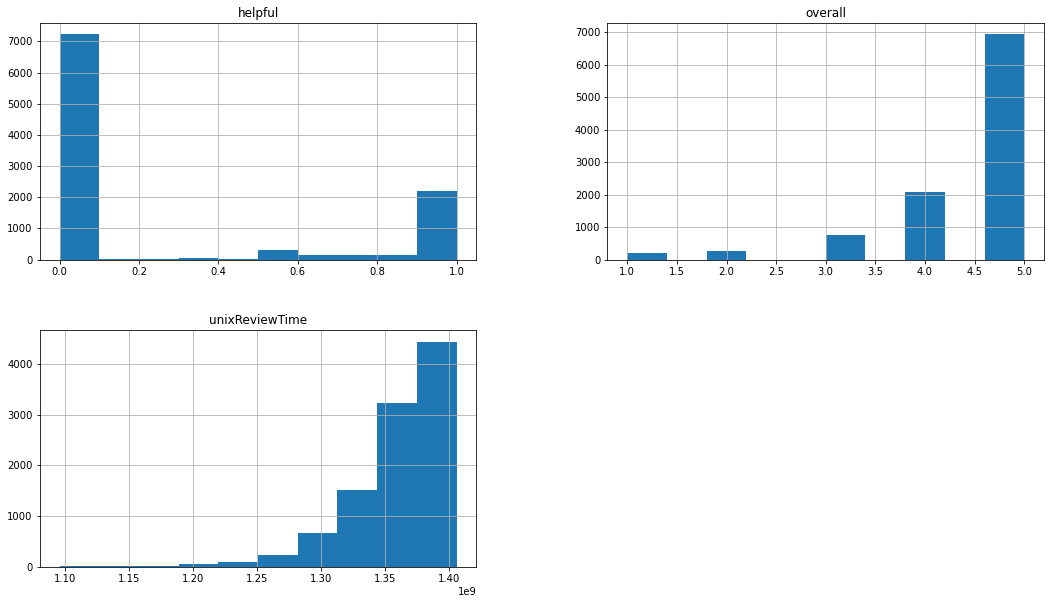

In [269]:
df.hist(figsize=(18,10))
plt.show()

Text(0.5, 0, 'Rating')

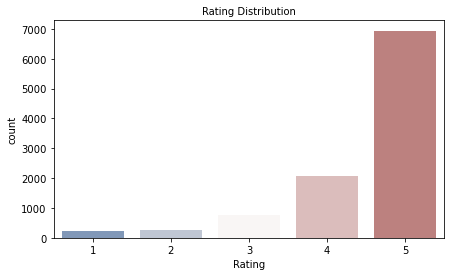

In [241]:
plt.figure(figsize=(7,4))
plt.title('Rating Distribution', fontsize=10)
sns.countplot(df.overall, palette="vlag")
plt.xlabel('Rating')

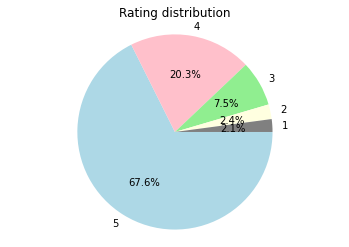

In [298]:
overall_occur = df['overall'].value_counts()
overall_v= [5,4,3,2,1]
fig, ax = plt.subplots()
ax.pie(overall_occur, labels=overall_v,  autopct='%1.1f%%', startangle=0, counterclock= False,colors=['lightblue','pink','lightgreen','lightyellow','grey'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Rating distribution')
plt.show()

In [311]:
df.describe()

,helpful,overall,unixReviewTime
count,10261.000000,10261.000000,1.026100e+04
mean,0.263789,4.488744,1.360606e+09
std,0.420002,0.894642,3.779735e+07
min,0.000000,1.000000,1.095466e+09
25%,0.000000,4.000000,1.343434e+09
50%,0.000000,5.000000,1.368490e+09
75%,0.670000,5.000000,1.388966e+09
max,1.000000,5.000000,1.405987e+09


In [341]:
pd.DataFrame(df.groupby('overall')['helpful'].mean())

,helpful
overall,
1,0.330553
2,0.287600
3,0.275687
4,0.282970
5,0.253758


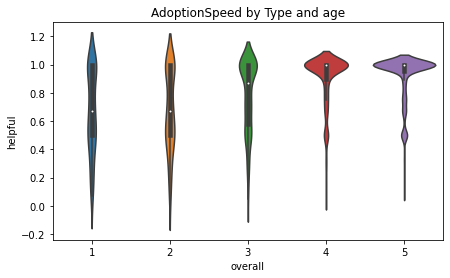

In [346]:
plt.figure(figsize=(7, 4));

senti_help= pd.DataFrame(df, columns = ['overall', 'helpful'])
senti_help = senti_help[senti_help['helpful'] != 0.00] 


sns.violinplot( x=senti_help["overall"], y=senti_help["helpful"])
plt.title('AdoptionSpeed by Type and age');


Text(0.5, 0, 'Year Wise Count')

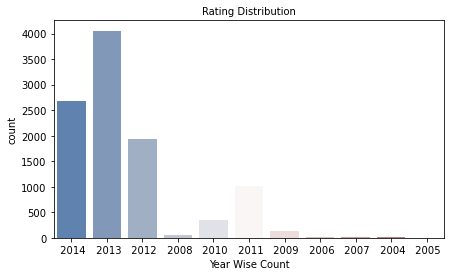

In [319]:
plt.figure(figsize=(7,4))
plt.title('Rating Distribution', fontsize=10)
sns.countplot(df.YY, palette="vlag")
plt.xlabel('Year Wise Count')

In [370]:
df['Message_Length'] = df['summary'].astype(str).map(len)

In [374]:
df['overall'].value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

In [375]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall', 'summary',
       'unixReviewTime', 'reviewTime', 'DD', 'YY', 'DT', 'MM',
       'Message_Length'],
      dtype='object')

In [ ]:
df.drop(['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'], axis=1, inplace=True)
#show new dataframe
df.head()

## Text Preprocessing

# Create NLP model that predict another musical instrument feedback statisfaction.

In [383]:
#get the stopwords and punctuation
stop = stopwords.words('english')
punc = list(punctuation)

In [384]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall', 'summary',
       'unixReviewTime', 'reviewTime', 'DD', 'YY', 'DT', 'MM',
       'Message_Length'],
      dtype='object')

In [387]:
#Removing unnecessary columns
rating_df=df.drop(['reviewerID','asin','reviewerName','unixReviewTime'], axis=1)
#Creating a copy 
reviews=rating_df.copy()

In [391]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [394]:
rating_df['summary']=rating_df['summary'].apply(lambda x:review_cleaning(x))
rating_df.head()

,helpful,overall,summary,reviewTime,DD,YY,DT,MM,Message_Length
0,0.00,5,not much to write about here but it does exact...,"02 28, 2014",02 28,2014,02,28,272
1,0.93,5,the product does exactly as it should and is q...,"03 16, 2013",03 16,2013,03,16,548
2,1.00,5,the primary job of this device is to block the...,"08 28, 2013",08 28,2013,08,28,456
3,0.00,5,nice windscreen protects my mxl mic and preven...,"02 14, 2014",02 14,2014,02,14,235
4,0.00,5,this pop filter is great it looks and performs...,"02 21, 2014",02 21,2014,02,21,196


# TFIDF(Term Frequency — Inverse Document Frequency)

In [399]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(rating_df['summary'])
X.shape


(10261, 5000)

In [403]:
#Getting the target variable(encoded)
y=rating_df['overall']
y.shape

(10261,)

In [407]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.6922323389345375
Decision Tree Test Accuracy: 0.5728476362387089
KNN Test Accuracy: 0.653054468910565


In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

In [ ]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [320]:
corr= df.corr()
corr

,helpful,overall,unixReviewTime
helpful,1.000000,-0.034798,-0.358179
overall,-0.034798,1.000000,-0.008992
unixReviewTime,-0.358179,-0.008992,1.000000


<AxesSubplot:>

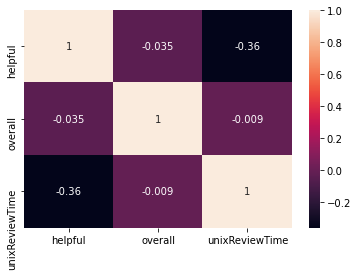

In [321]:
sns.heatmap(corr,annot=True)

In [29]:

# smoker and age have positive correlations with charges

# Step 5: Traning and Testing Dataset

In [30]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [31]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']


In [32]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [34]:
X.shape

(1338, 8)

In [35]:
y.shape

(1338,)

In [36]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [37]:
y = y.reshape(-1,1)

In [38]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [40]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


# Step 6: Train and Test Linerar Regression Model

In [41]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [42]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7835929593885519

In [43]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [44]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [45]:
k = X_test.shape[1]
n = len(X_test)
print(k,n)

8 268


In [46]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 =1-(1-r2)* (n-1)/(n-k-1)

In [47]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5796.285 
MSE = 33596916.0 
MAE = 4181.195 
R2 = 0.7835929761081216 
Adjusted R2 = 0.7769085892697625


# Step 7 : ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [1]:
#!pip install tensorflow

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=f2e65ff513f1e1cd576b79d6f5e779ed2eac9867cc53d3c41f0387bc038f5644
  Stored in directory: c:\users\whiz.ai\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=bdb71c8b15a4f893483f3680fe7f5a667999847e05daa6c2cad79932e4407751
  Stored in directory: c:\users\whiz.ai\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
# optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

In [ ]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

MINI CHALLENGE
- Experiment with a deeper network with more neurons in the hidden layer
- Experiment with no regularization (dropout)

# EXCELLENT JOB!